In [35]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [36]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

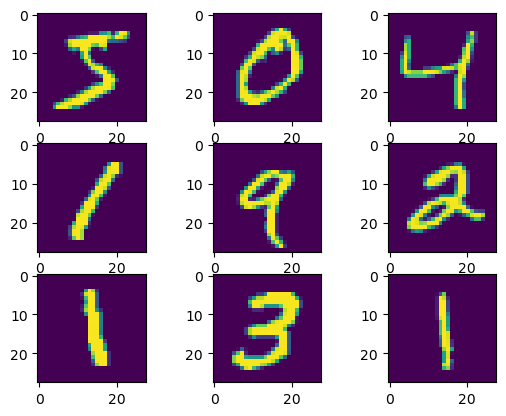

In [37]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(training_images[i])


In [38]:
training_labels[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

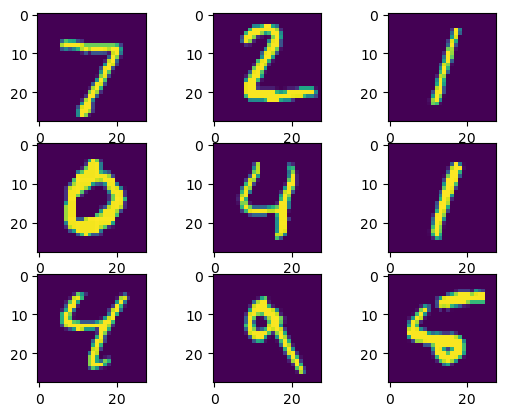

In [39]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(test_images[i])

In [40]:
print("Shape of training data : ",training_images.shape)
print(training_images[0])

Shape of training data :  (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0 

In [41]:
print("Shape of testing data : ",test_images.shape)

Shape of testing data :  (10000, 28, 28)


In [42]:
test_images[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

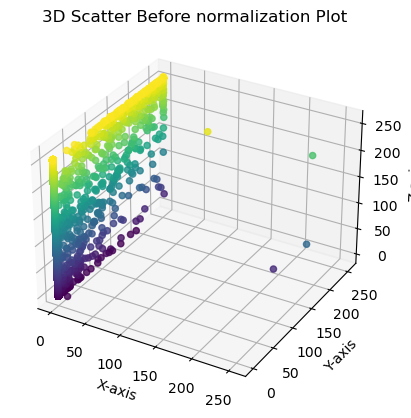

In [43]:
# Visualizing data before normalization

x = training_images[:, 0]  
y = training_images[:, 1]  
z = training_images[:, 2] 

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c=z, cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title("3D Scatter Before normalization Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()

In [44]:
# Normalization of the data by dividing it by a constant 
training_images  = training_images / 255.0
test_images = test_images / 255.0

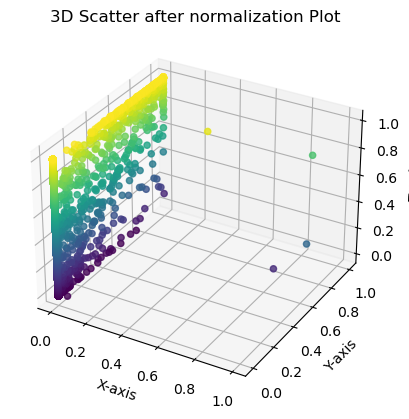

In [45]:
# Visualizing data after normalization

x = training_images[:, 0]  
y = training_images[:, 1]  
z = training_images[:, 2] 

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c=z, cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title("3D Scatter after normalization Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
#Including Callback to stop training the model after a desired accruracy is reached

class Stop_Training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        
        if(logs.get('acc')>=0.90):
            print("\nReached 90% accuracy so Stopping the training process!")
            self.model.stop_training = True
callbacks=Stop_Training()



In [ ]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1005/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9974 - loss: 0.0093

In [16]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0909
[0.08115729689598083, 0.9750999808311462]


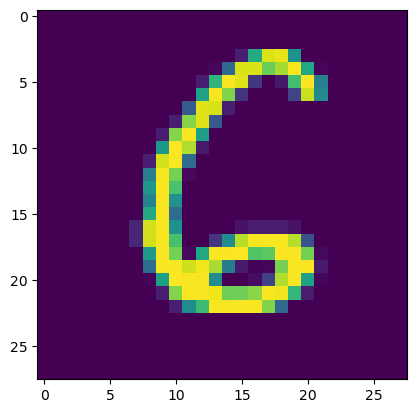

In [25]:
plt.imshow(test_images[98])

In [26]:
prediction=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
print(np.argmax(prediction[98]))

6
